<a href="https://colab.research.google.com/github/Abre1234/CodeAlpha_Car_Price_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CodeAlpha_Internship
Task_Name:Car_Price_Prediction
Dataset :from kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car data.csv')  # Adjust if path differs
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:

# Shape and basic info
print("Shape:", df.shape)
df.info()
df.isnull().sum()

Shape: (301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [5]:

# Create a new column with only the car brand (first word from Car_Name)
df['Car_Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])
df[['Car_Name', 'Car_Brand']].head()

,Car_Name,Car_Brand
0,ritz,ritz
1,sx4,sx4
2,ciaz,ciaz
3,wagon r,wagon
4,swift,swift


In [6]:

# Define brand goodwill scores
def get_goodwill(row):
    brand_scores = {
        'Toyota': 0.9, 'Honda': 0.85, 'Hyundai': 0.8, 'Maruti': 0.75,
        'Ford': 0.7, 'Chevrolet': 0.6, 'Tata': 0.65, 'Volkswagen': 0.7,
        'Renault': 0.6, 'Skoda': 0.65, 'Mahindra': 0.7
    }
    return brand_scores.get(row['Car_Brand'], 0.7)  # default score if unknown brand

# Apply function to each row
df['Brand_Goodwill'] = df.apply(get_goodwill, axis=1)
df[['Car_Brand', 'Brand_Goodwill']].head()

,Car_Brand,Brand_Goodwill
0,ritz,0.7
1,sx4,0.7
2,ciaz,0.7
3,wagon,0.7
4,swift,0.7


In [7]:

# If fuel is encoded, decode it
if df['Fuel_Type'].dtype != 'object':
    fuel_map = {0: 'CNG', 1: 'Diesel', 2: 'Petrol'}
    df['Fuel_Type'] = df['Fuel_Type'].map(fuel_map)

# Function to calculate mileage
def get_mileage(row):
    if row['Fuel_Type'] == 'Diesel':
        return 22 if row['Car_Brand'] in ['Toyota', 'Honda', 'Hyundai'] else 20
    elif row['Fuel_Type'] == 'Petrol':
        return 18 if row['Car_Brand'] in ['Maruti', 'Hyundai'] else 16
    elif row['Fuel_Type'] == 'CNG':
        return 24
    else:
        return 18

df['Mileage'] = df.apply(get_mileage, axis=1)
df[['Fuel_Type', 'Car_Brand', 'Mileage']].head()

,Fuel_Type,Car_Brand,Mileage
0,Petrol,ritz,16
1,Diesel,sx4,20
2,Petrol,ciaz,16
3,Petrol,wagon,16
4,Diesel,swift,20


In [8]:

def get_horsepower(row):
    if row['Present_Price'] > 15:
        return 130
    elif row['Present_Price'] > 10:
        return 110
    elif row['Present_Price'] > 5:
        return 90
    else:
        return 70

df['Horsepower'] = df.apply(get_horsepower, axis=1)
df[['Present_Price', 'Horsepower']].head()

,Present_Price,Horsepower
0,5.59,90
1,9.54,90
2,9.85,90
3,4.15,70
4,6.87,90


In [9]:
df[['Car_Brand', 'Fuel_Type', 'Present_Price', 'Mileage', 'Horsepower', 'Brand_Goodwill']].head()

,Car_Brand,Fuel_Type,Present_Price,Mileage,Horsepower,Brand_Goodwill
0,ritz,Petrol,5.59,16,90,0.7
1,sx4,Diesel,9.54,20,90,0.7
2,ciaz,Petrol,9.85,16,90,0.7
3,wagon,Petrol,4.15,16,70,0.7
4,swift,Diesel,6.87,20,90,0.7


In [10]:
df.drop(['Car_Name', 'Car_Brand'], axis=1, inplace=True)

In [11]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])  # ✅ Corrected here
df['Transmission'] = le.fit_transform(df['Transmission'])

In [ ]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Brand_Goodwill', 'Mileage',
       'Horsepower'],
      dtype='object')

In [12]:

for col in ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']:
    print(f"{col} → {df[col].unique()}")

Fuel_Type → [2 1 0]
Selling_type → [0 1]
Transmission → [1 0]
Owner → [0 1 3]


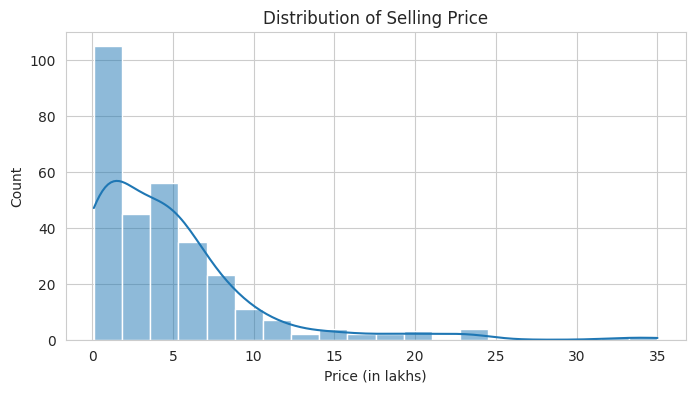

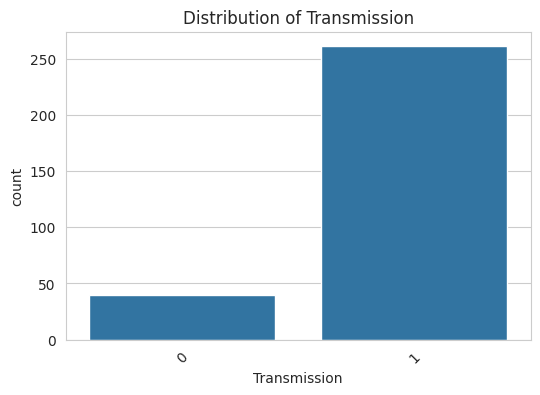

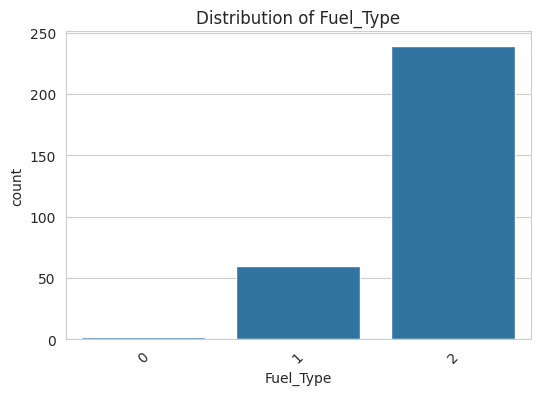

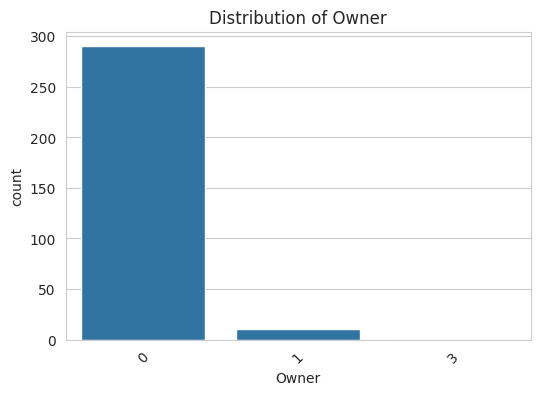

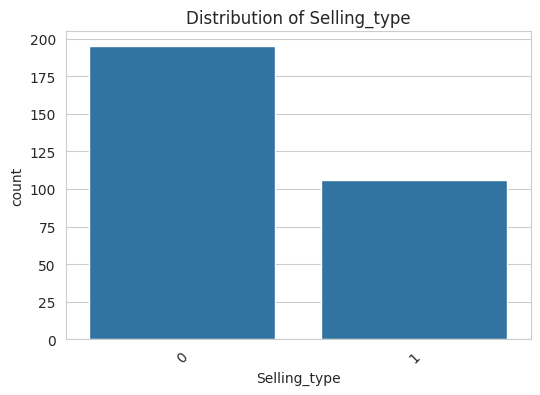

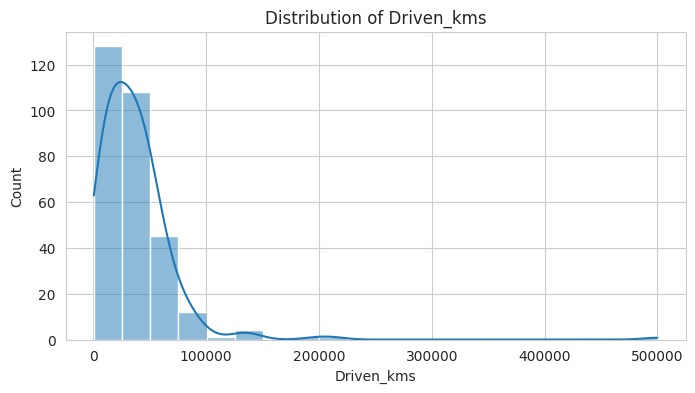

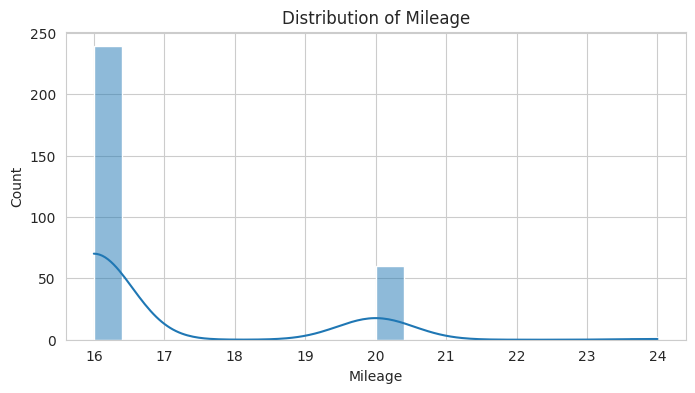

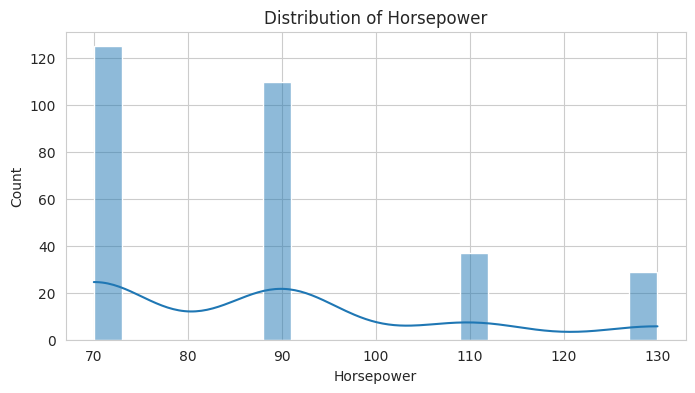

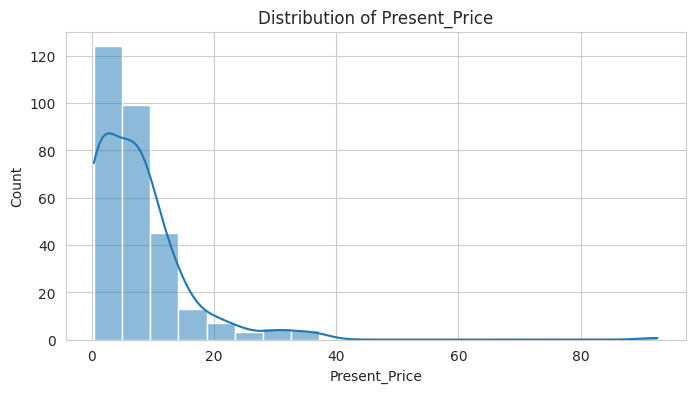

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# 1. Selling_Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], kde=True, bins=20)
plt.title("Distribution of Selling Price")
plt.xlabel("Price (in lakhs)")
plt.ylabel("Count")
plt.show()

# 2. Categorical Features (Transmission, Fuel_Type, etc.)
cat_features = ['Transmission', 'Fuel_Type', 'Owner', 'Selling_type']
for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)
    plt.show()

# 3. Numerical Features (Driven_kms, Mileage, etc.)
num_features = ['Driven_kms', 'Mileage', 'Horsepower', 'Present_Price']
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.show()

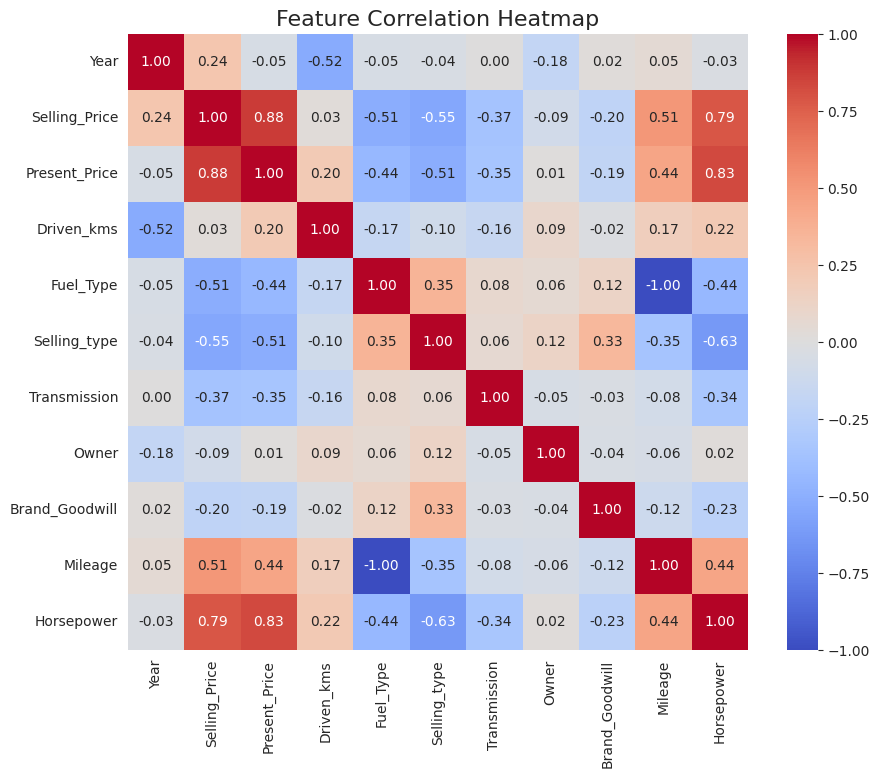

In [14]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

Text(0.5, 1.0, 'Car Age vs Selling Price')

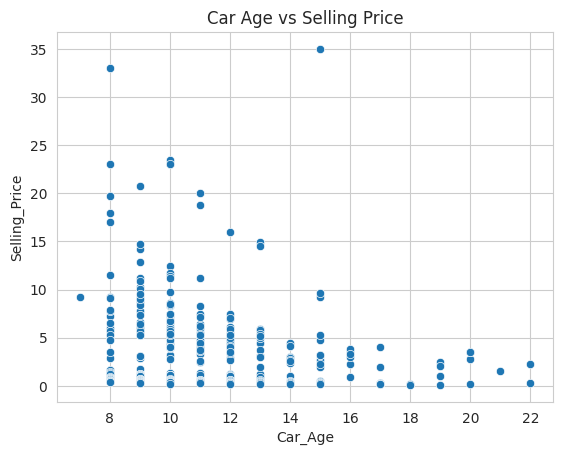

In [15]:

df['Car_Age'] = 2025 - df['Year']
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title("Car Age vs Selling Price")

In [16]:

import pandas as pd
import numpy as np
from scipy import stats

def remove_outliers(df, numerical_cols, z_threshold=3):
    """
    Remove outliers using z-score method for specified numerical columns.
    Preserves original categorical data and only filters numerical outliers.

    Args:
        df: Input DataFrame
        numerical_cols: List of numerical columns to process
        z_threshold: Z-score cutoff (default 3)

    Returns:
        DataFrame with outliers removed
    """
    df_clean = df.copy()

    for col in numerical_cols:
        if col in df.columns:
            # Calculate z-scores for the column
            z_scores = np.abs(stats.zscore(df_clean[col]))

            # Filter rows where z-score is below threshold
            df_clean = df_clean[z_scores < z_threshold]

    return df_clean.reset_index(drop=True)

# Identify numerical columns (excluding categorical and year)
numerical_cols = ['Selling_Price', 'Present_Price', 'Driven_kms',
                 'Brand_Goodwill', 'Mileage', 'Horsepower', 'Car_Age']

# Remove outliers
df_clean = remove_outliers(df, numerical_cols)

# Print comparison
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print(f"Rows removed: {len(df) - len(df_clean)} ({((len(df)-len(df_clean))/len(df))*100:.1f}%)")

Original shape: (301, 12)
Cleaned shape: (262, 12)
Rows removed: 39 (13.0%)


In [17]:

X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [18]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred1 = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 1.297070610713762
MSE: 3.8334837709686584
RMSE: 1.957928438674064
R²: 0.8335842631823802


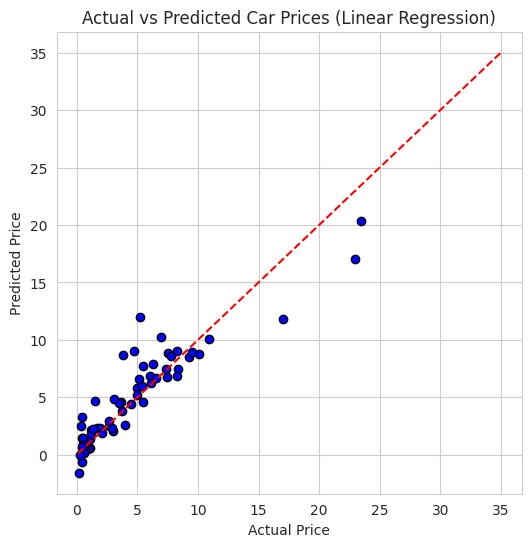

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred1, color='blue', edgecolors='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect line
plt.show()

Random Forest

MAE: 0.6081114754098365
MSE: 0.8361292599999993
RMSE: 0.9144010389320428
R²: 0.9637027113740692
           Feature  Importance
1    Present_Price    0.864321
10         Car_Age    0.033007
2       Driven_kms    0.032828
0             Year    0.032515
9       Horsepower    0.018127
5     Transmission    0.009188
3        Fuel_Type    0.004042
4     Selling_type    0.002700
8          Mileage    0.002210
6            Owner    0.001048
7   Brand_Goodwill    0.000013


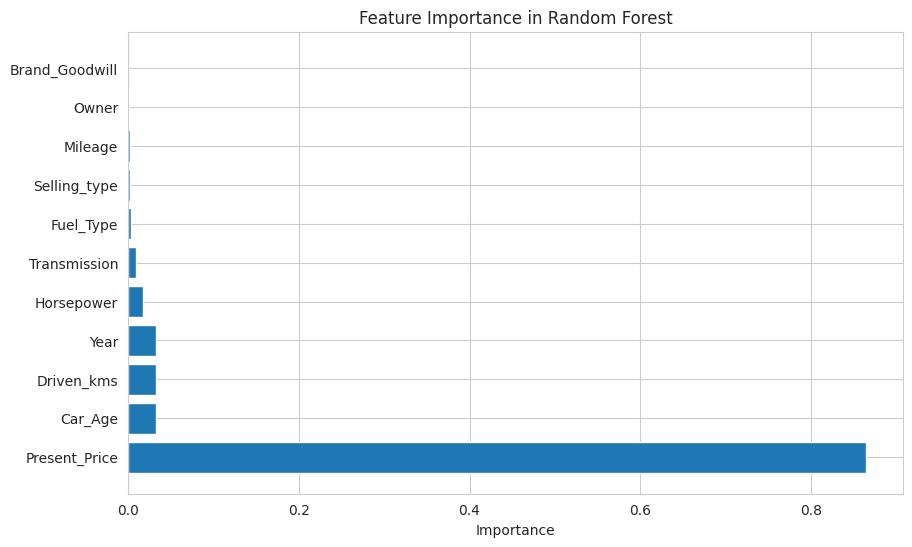

In [20]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importances)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

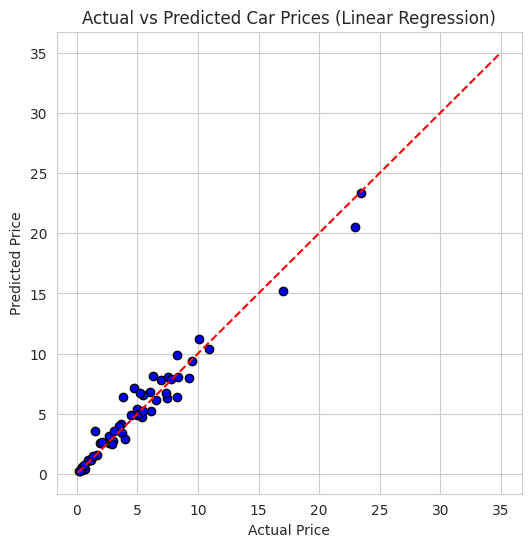

In [21]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect line
plt.show()

Random Forest is best because of r_2 of RF is greater than r_2 of LR